# Email Spam Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
model = RandomForestClassifier()


In [4]:
df = pd.read_csv('DATI/emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# drop 'Email No.' column
df.drop(columns=['Email No.'], inplace=True)
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# Count null values
df.isnull().sum().sum()

np.int64(0)

In [16]:
# Count duplicates
df.duplicated().sum()

np.int64(0)

In [15]:
# Drop duplicates
df.drop_duplicates(inplace=True)

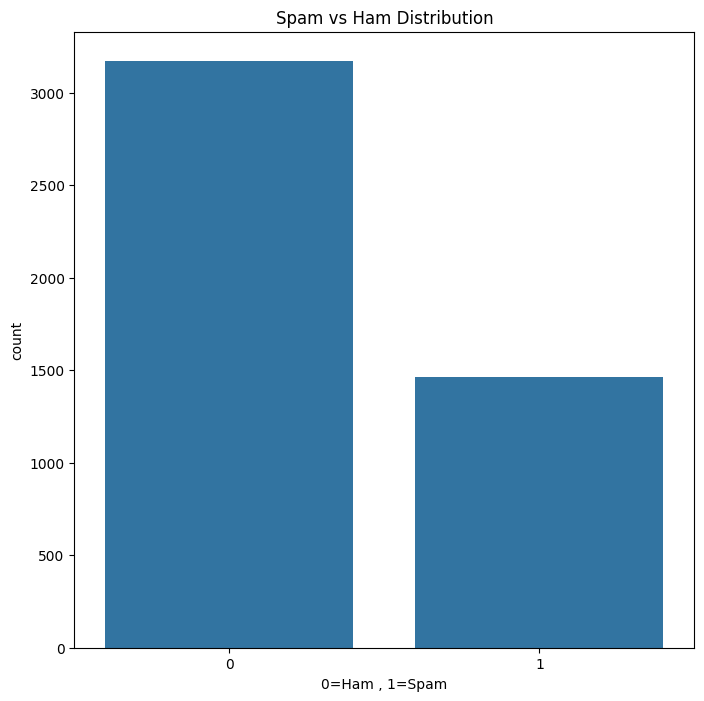

In [17]:
# explore the data with countplot 
plt.figure(figsize=(8, 8))
sns.countplot(x='Prediction', data=df)
plt.title("Spam vs Ham Distribution")
plt.xlabel("0=Ham , 1=Spam")
plt.show()

In [18]:
# Prepare x and y
x = df.drop(columns=['Prediction'], axis=1)
y = df['Prediction']

In [19]:
x.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3241, 3000), (1390, 3000), (3241,), (1390,))

In [24]:
# train the model
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# predict
y_pred = model.predict(x_test)

In [26]:
# calc accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {model_accuracy:.2f}")

Model Accuracy: 0.97


In [ ]:
# display the distribution of classes in y
print(y.value_counts())